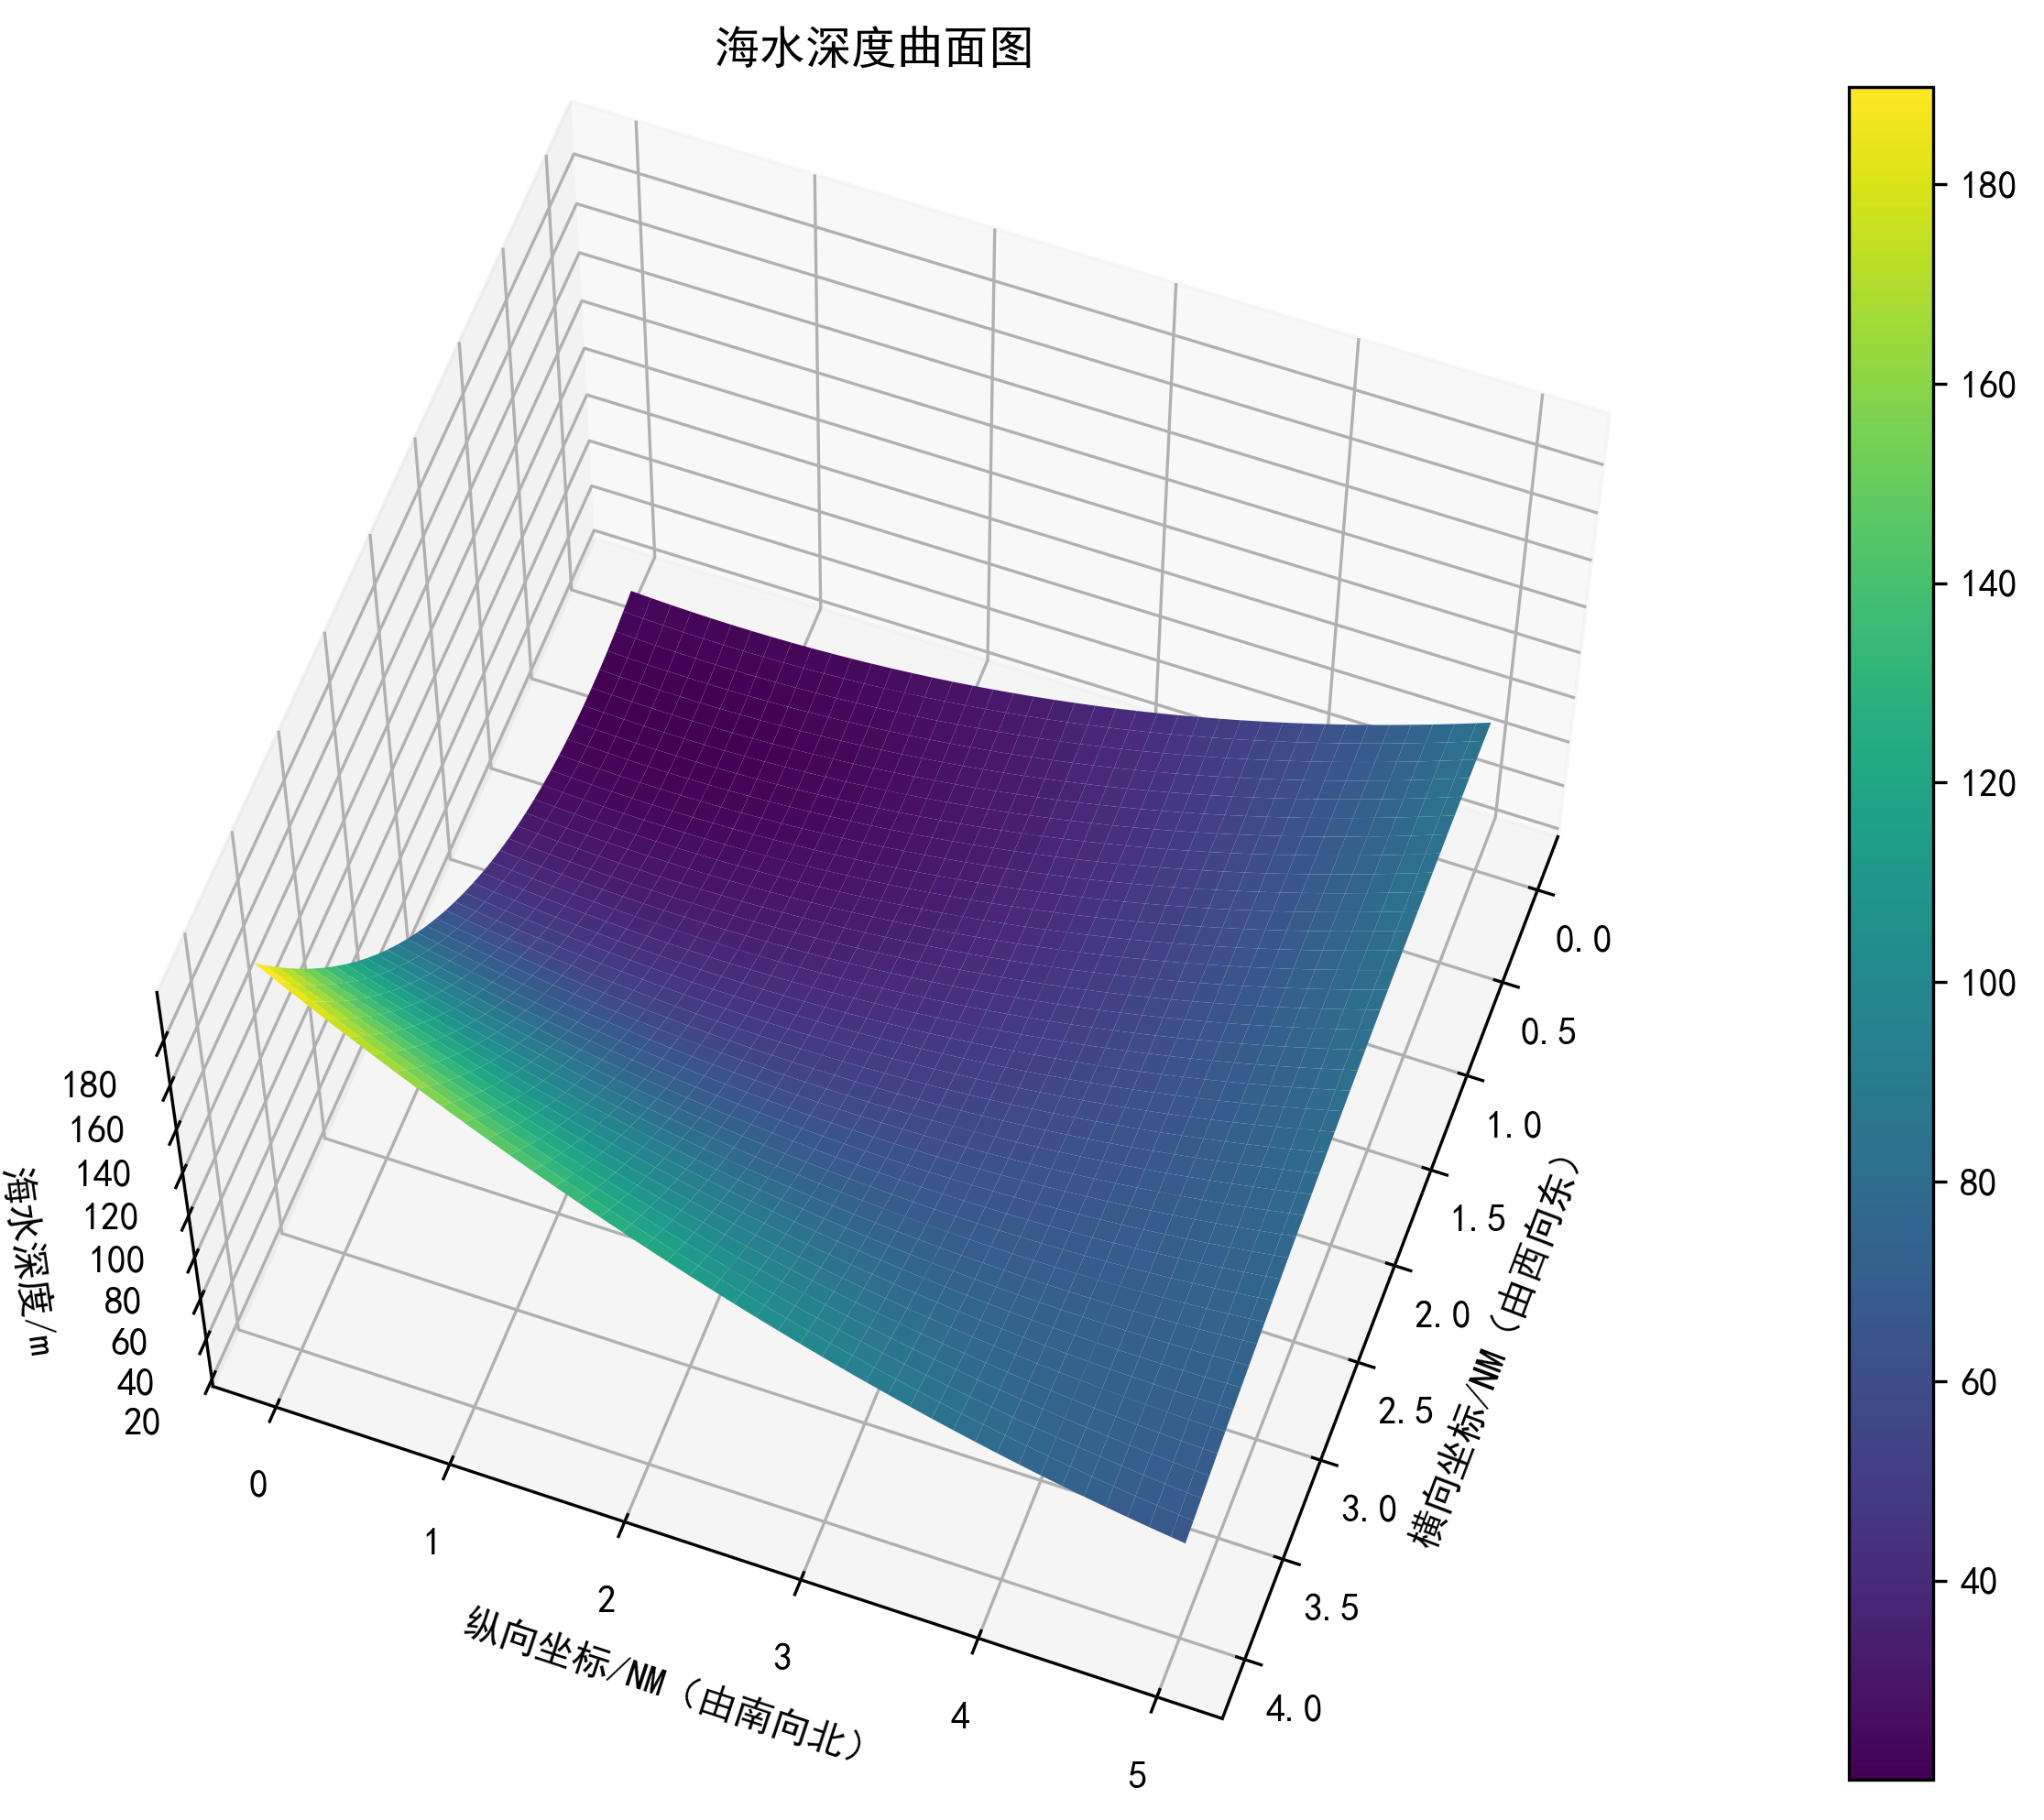

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Reload the data from the newly uploaded file
data = pd.read_excel("E:/数学建模/2023数模/B题/附件.xlsx")


# Extract and process the data for plotting
headers = data.iloc[0, 2:].values
latitude = data.iloc[1:, 1].values

cleaned_data = data.iloc[1:, 2:]
cleaned_data.columns = list(headers)
cleaned_data.index = pd.Index(latitude)

X = cleaned_data.columns.values.astype(float)
Y = cleaned_data.index.values.astype(float)
X, Y = np.meshgrid(X, Y)
Z = cleaned_data.values

# Plot the 3D surface again
fig = plt.figure(figsize=(12, 8),dpi=300)
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.view_init(elev=60,azim=20)
# Setting the labels and title
ax.set_xlabel('横向坐标/NM（由西向东）')
ax.set_ylabel('纵向坐标/NM（由南向北）')
ax.set_zlabel('海水深度/m')
ax.set_title('海水深度曲面图')

# Adding a colorbar
fig.colorbar(surf)

plt.show()



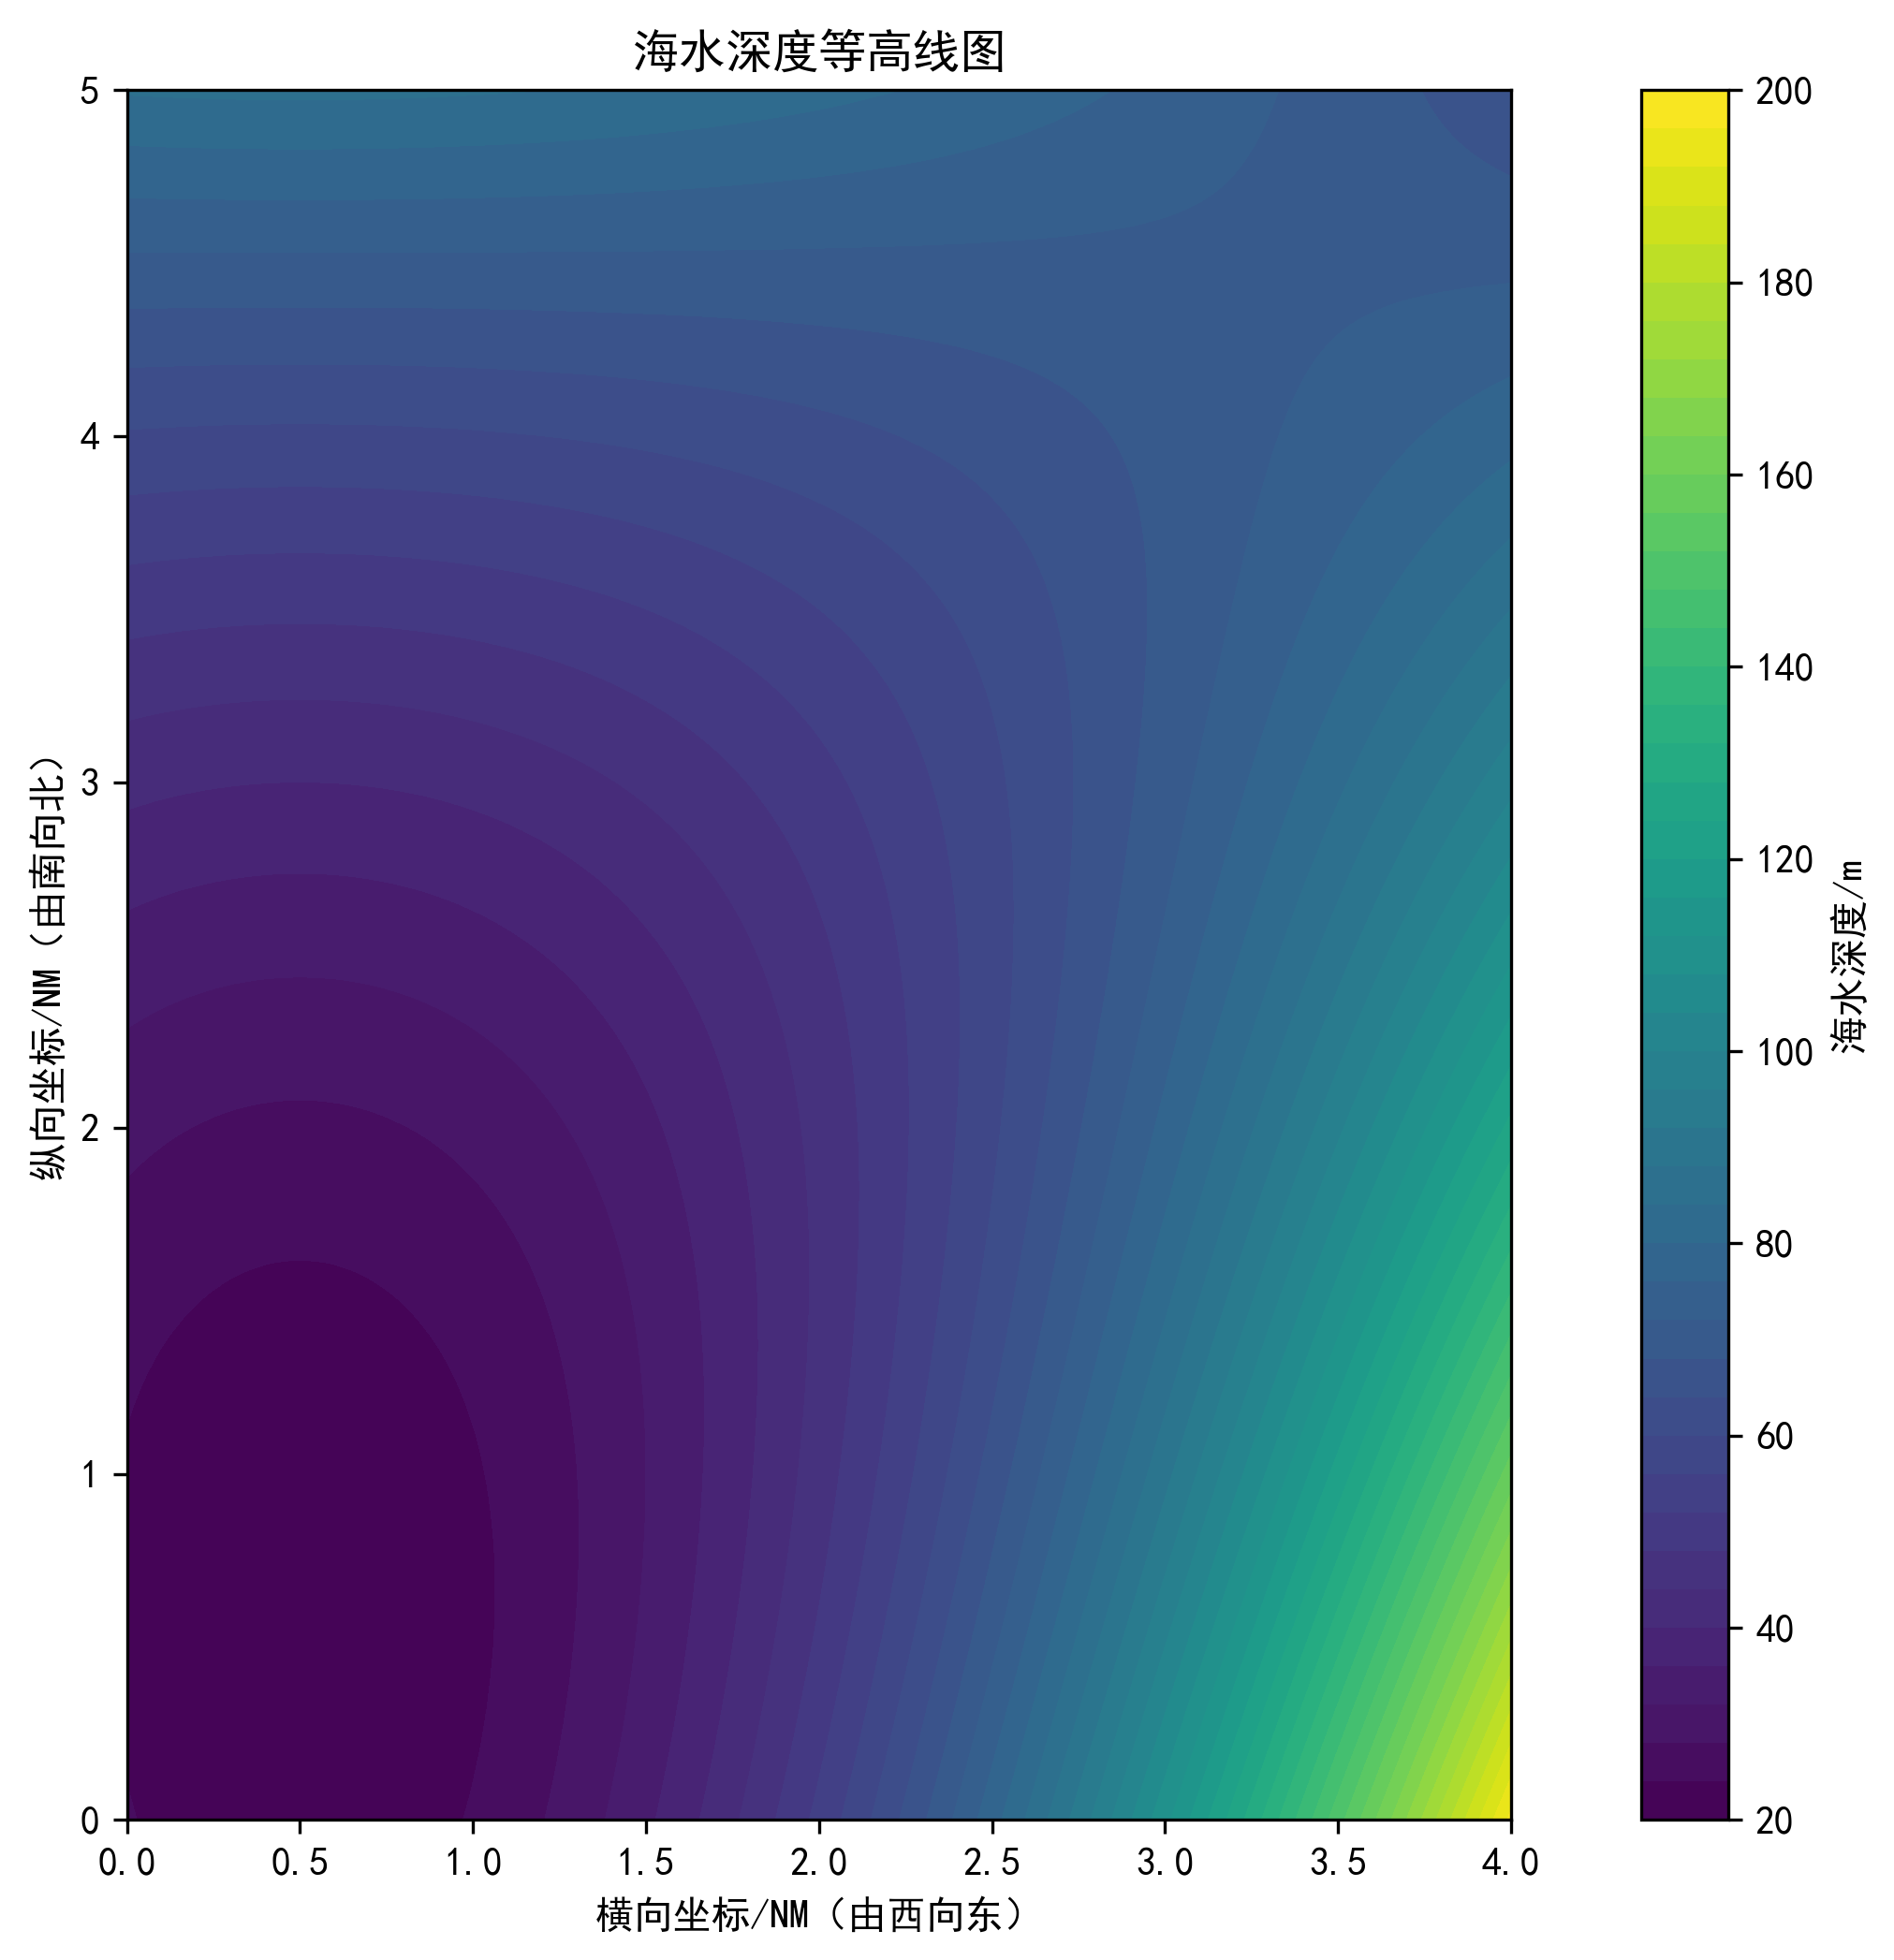

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 重新加载数据
data = pd.read_excel("E:/数学建模/2023数模/B题/附件.xlsx")

# 提取和处理用于绘图的数据
headers = data.iloc[0, 2:].values
latitude = data.iloc[1:, 1].values

cleaned_data = data.iloc[1:, 2:]
cleaned_data.columns = list(headers)
cleaned_data.index = pd.Index(latitude)

X = cleaned_data.columns.values.astype(float)
Y = cleaned_data.index.values.astype(float)
X, Y = np.meshgrid(X, Y)
Z = cleaned_data.values

# 绘制等高线图
plt.figure(figsize=(12, 8), dpi=300)
contour = plt.contourf(X, Y, Z, cmap='viridis', levels=50)
plt.colorbar(contour, label='海水深度/m')

# 添加地图背景
plt.imshow(np.zeros_like(Z), extent=[X.min(), X.max(), Y.min(), Y.max()], cmap='gray', alpha=0.2)

plt.xlabel('横向坐标/NM（由西向东）')
plt.ylabel('纵向坐标/NM（由南向北）')
plt.title('海水深度等高线图')
plt.show()


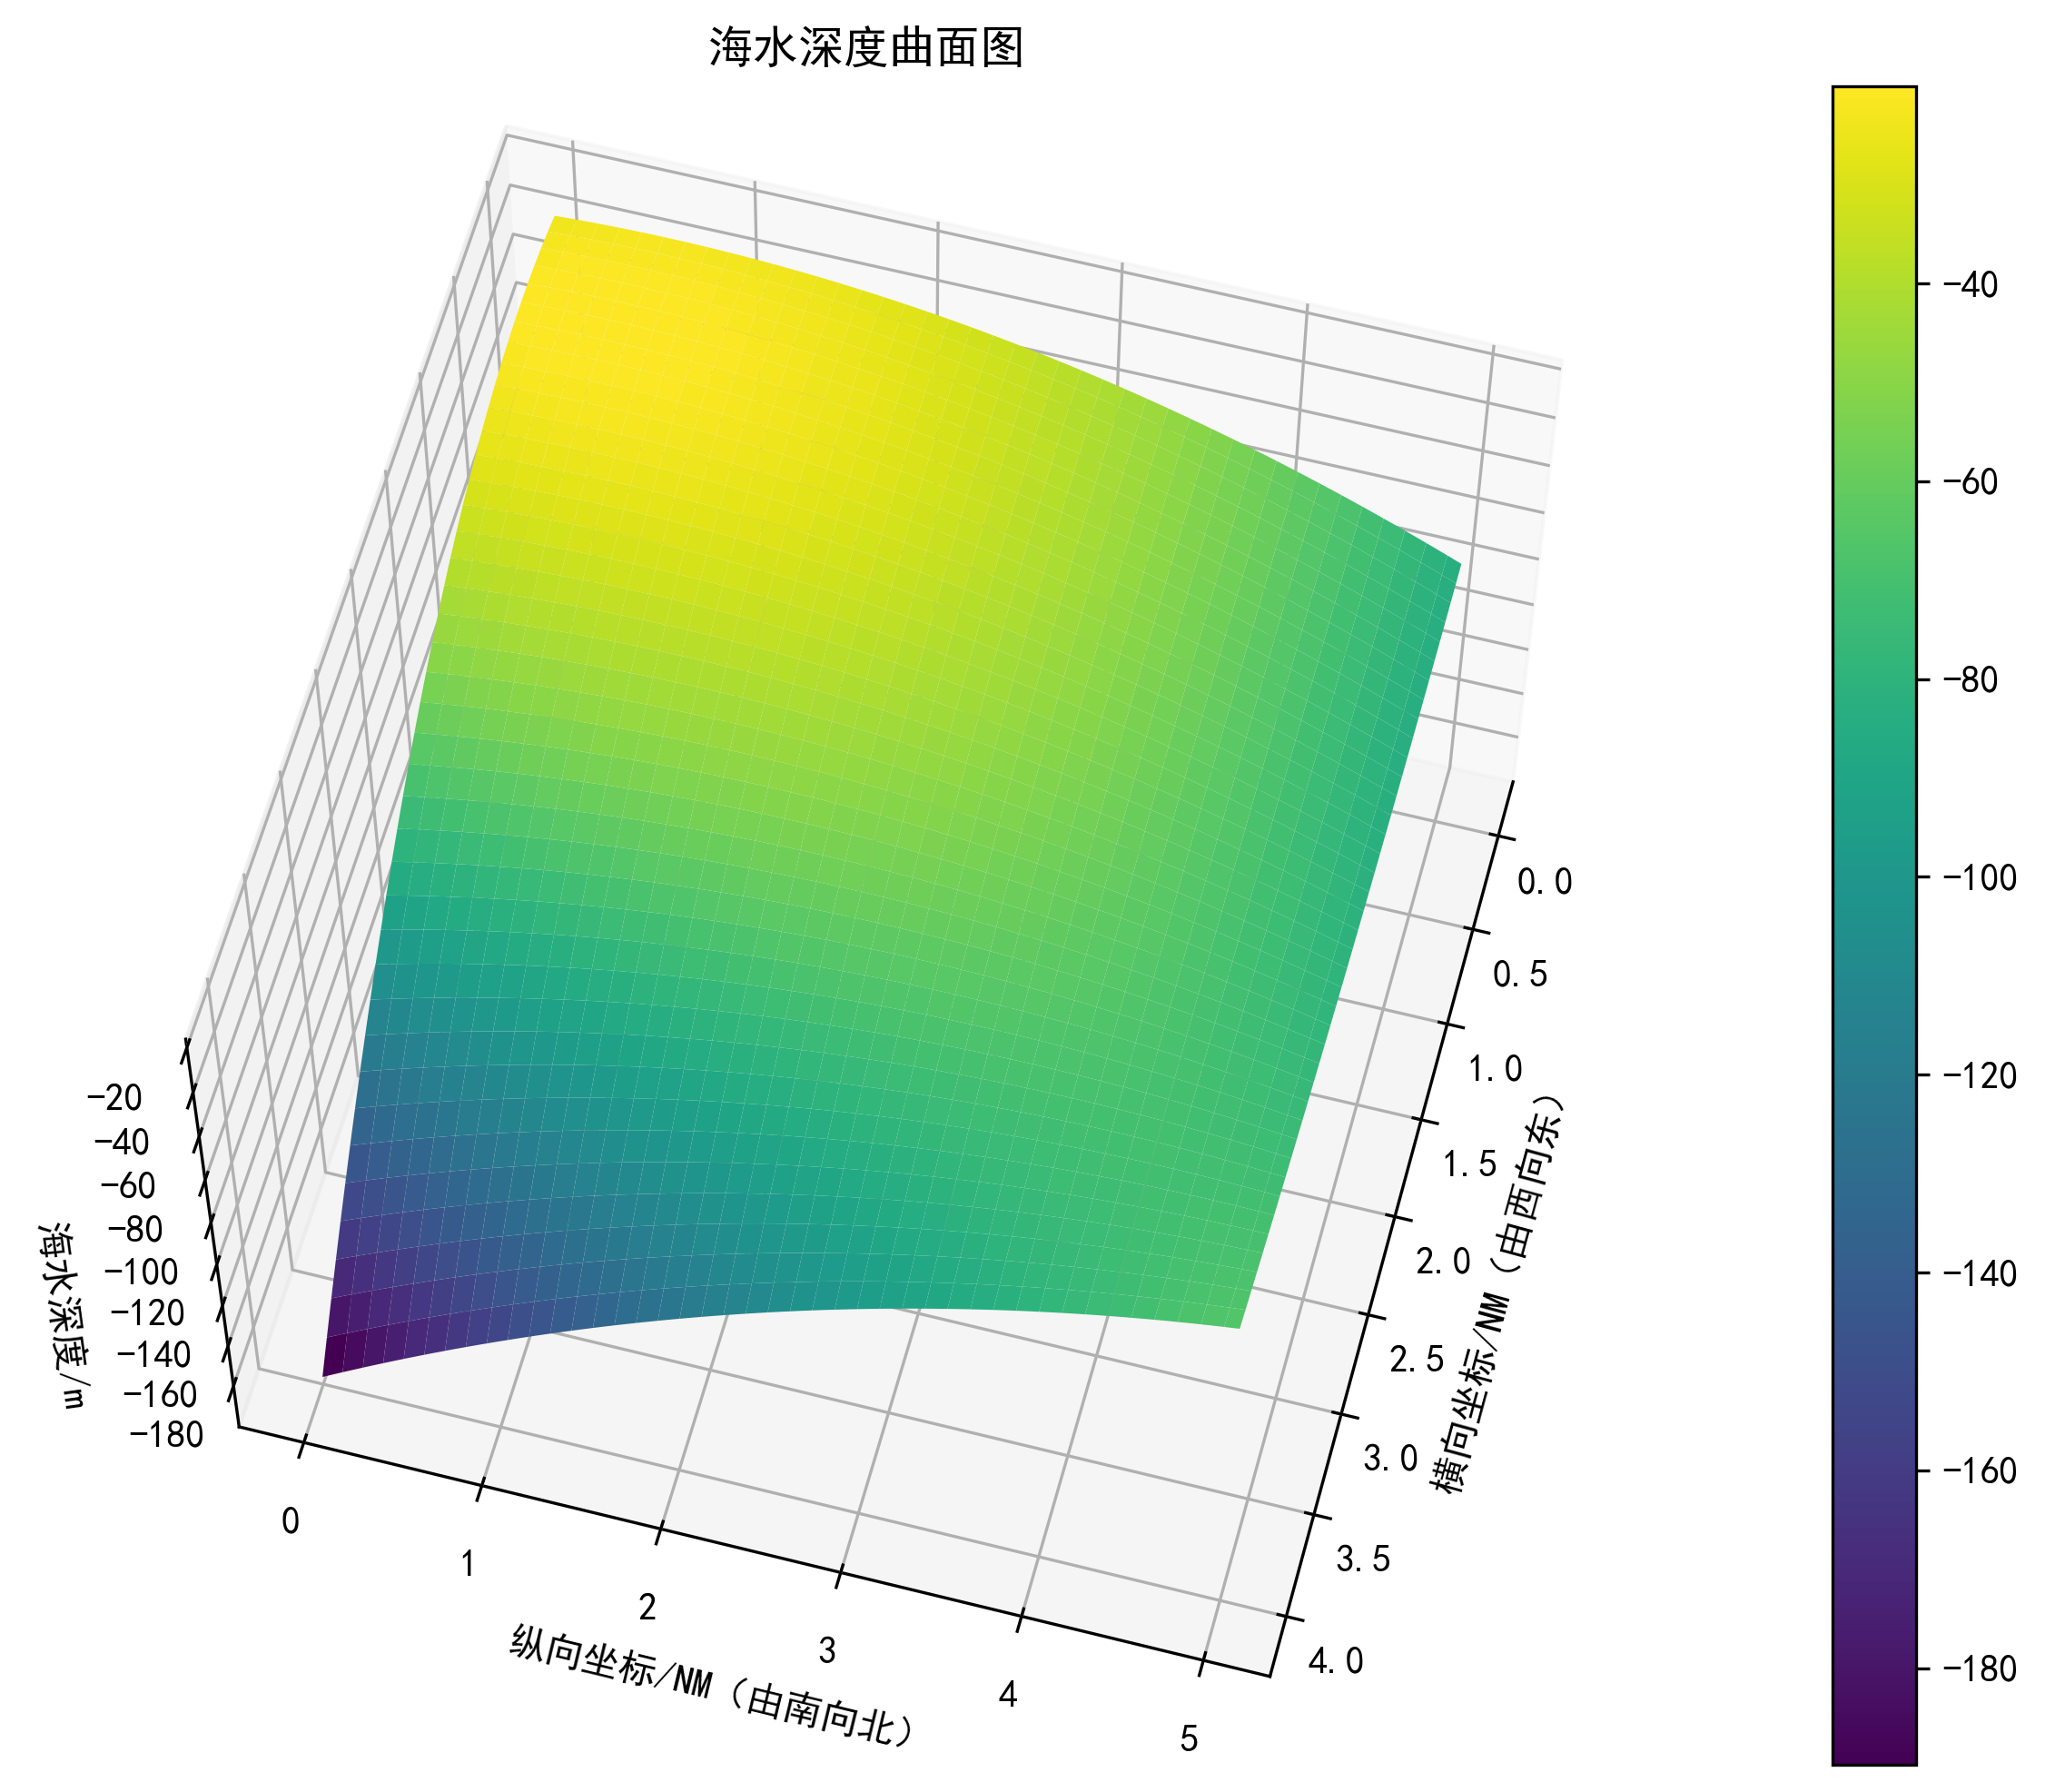

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Reload the data from the newly uploaded file
data = pd.read_excel("E:/数学建模/2023数模/B题/附件.xlsx")


# Extract and process the data for plotting
headers = data.iloc[0, 2:].values
latitude = data.iloc[1:, 1].values

cleaned_data = data.iloc[1:, 2:]
cleaned_data.columns = list(headers)
cleaned_data.index = pd.Index(latitude)

X = cleaned_data.columns.values.astype(float)
Y = cleaned_data.index.values.astype(float)
X, Y = np.meshgrid(X, Y)
Z = cleaned_data.values
Z=-Z
# Plot the 3D surface again
fig = plt.figure(figsize=(12, 8),dpi=300)
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.view_init(elev=60,azim=15)
# Setting the labels and title
ax.set_xlabel('横向坐标/NM（由西向东）')
ax.set_ylabel('纵向坐标/NM（由南向北）')
ax.set_zlabel('海水深度/m')
ax.set_title('海水深度曲面图')

# Adding a colorbar
fig.colorbar(surf)

plt.show()

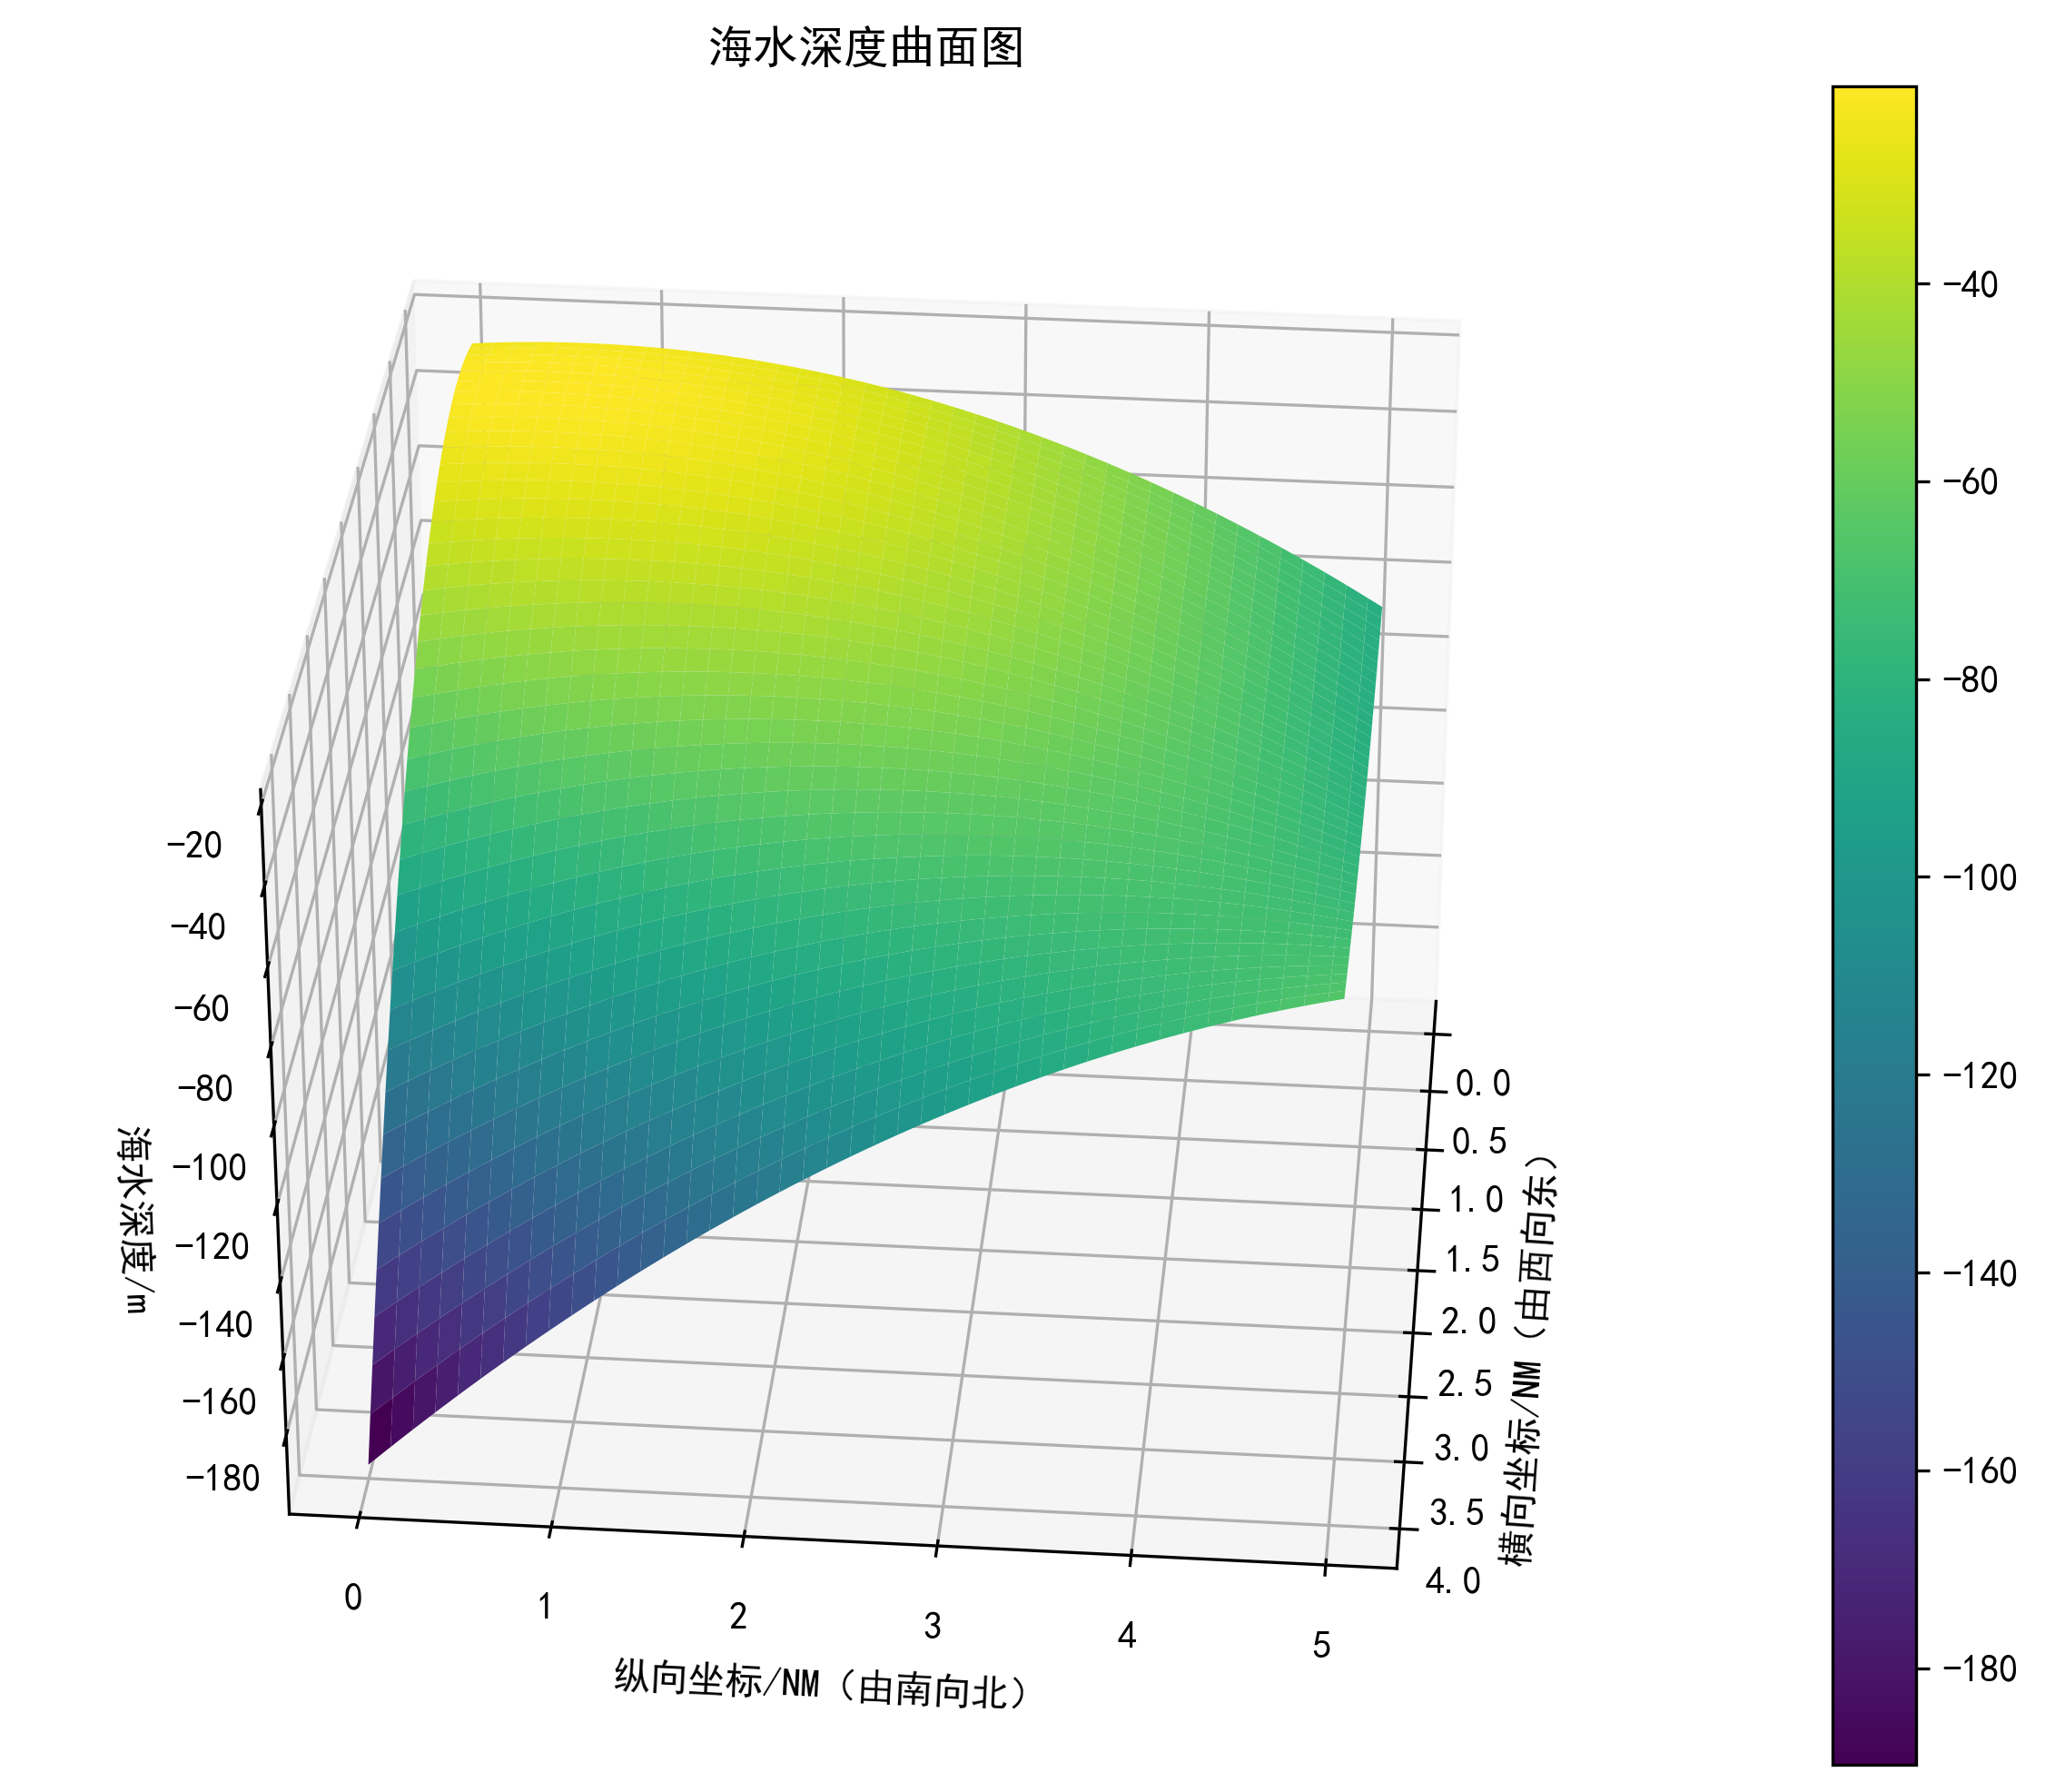

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Reload the data from the newly uploaded file
data = pd.read_excel("E:/数学建模/2023数模/B题/附件.xlsx")


# Extract and process the data for plotting
headers = data.iloc[0, 2:].values
latitude = data.iloc[1:, 1].values

cleaned_data = data.iloc[1:, 2:]
cleaned_data.columns = list(headers)
cleaned_data.index = pd.Index(latitude)

X = cleaned_data.columns.values.astype(float)
Y = cleaned_data.index.values.astype(float)
X, Y = np.meshgrid(X, Y)
Z = cleaned_data.values
Z=-Z
# Plot the 3D surface again
fig = plt.figure(figsize=(12, 8),dpi=300)
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.view_init(elev=30,azim=5)
# Setting the labels and title
ax.set_xlabel('横向坐标/NM（由西向东）')
ax.set_ylabel('纵向坐标/NM（由南向北）')
ax.set_zlabel('海水深度/m')
ax.set_title('海水深度曲面图')

# Adding a colorbar
fig.colorbar(surf)

plt.show()

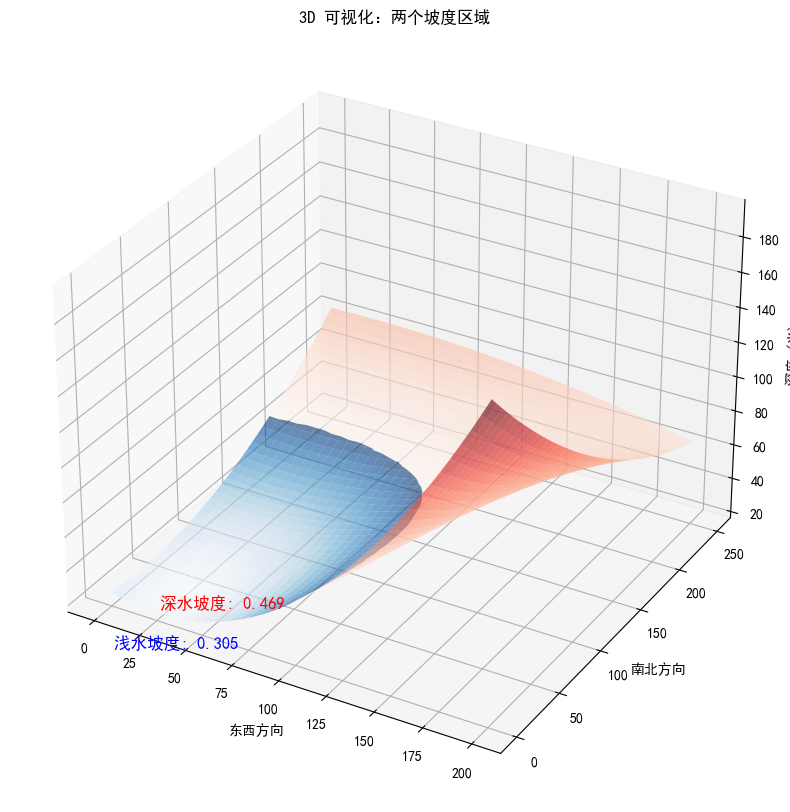

In [22]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 加载数据
data_df = pd.read_excel("E:/数学建模/2023数模/B题/附件.xlsx", header=None)
cleaned_data = data_df.iloc[2:, 2:].astype(float).values

# 定义浅水区域的坡度阈值
shallow_water_threshold = 50

# 判断每个位置是属于浅水还是深水
shallow_region = cleaned_data < shallow_water_threshold
deep_region = cleaned_data >= shallow_water_threshold

# 创建x和y的网格
x = np.arange(cleaned_data.shape[1])
y = np.arange(cleaned_data.shape[0])
x, y = np.meshgrid(x, y)

# 为了可视化，设置浅水和深水区域的掩码
shallow_mask = shallow_region * cleaned_data
shallow_mask[shallow_mask == 0] = np.nan  # 使用NaN替换0以进行可视化

deep_mask = deep_region * cleaned_data
deep_mask[deep_mask == 0] = np.nan  # 使用NaN替换0以进行可视化

# 计算坡度
gradient_y, gradient_x = np.gradient(cleaned_data)
slope_shallow = np.mean(gradient_y[shallow_region] + gradient_x[shallow_region])
slope_deep = np.mean(gradient_y[deep_region] + gradient_x[deep_region])

# 3D可视化并标注坡度
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, shallow_mask, cmap='Blues', label='Shallow Region', alpha=0.6)
ax.plot_surface(x, y, deep_mask, cmap='Reds', label='Deep Region', alpha=0.6)
ax.text(0, 0, -10, f"浅水坡度: {slope_shallow:.3f}", color='blue', fontsize=12, weight='bold')
ax.text(0, 50, -10, f"深水坡度: {slope_deep:.3f}", color='red', fontsize=12, weight='bold')
ax.set_title("3D 可视化：两个坡度区域")
ax.set_xlabel("东西方向")
ax.set_ylabel("南北方向")
ax.set_zlabel("深度 (米)")
ax.view_init(elev=30, azim=-60)  # 调整视角
plt.show()




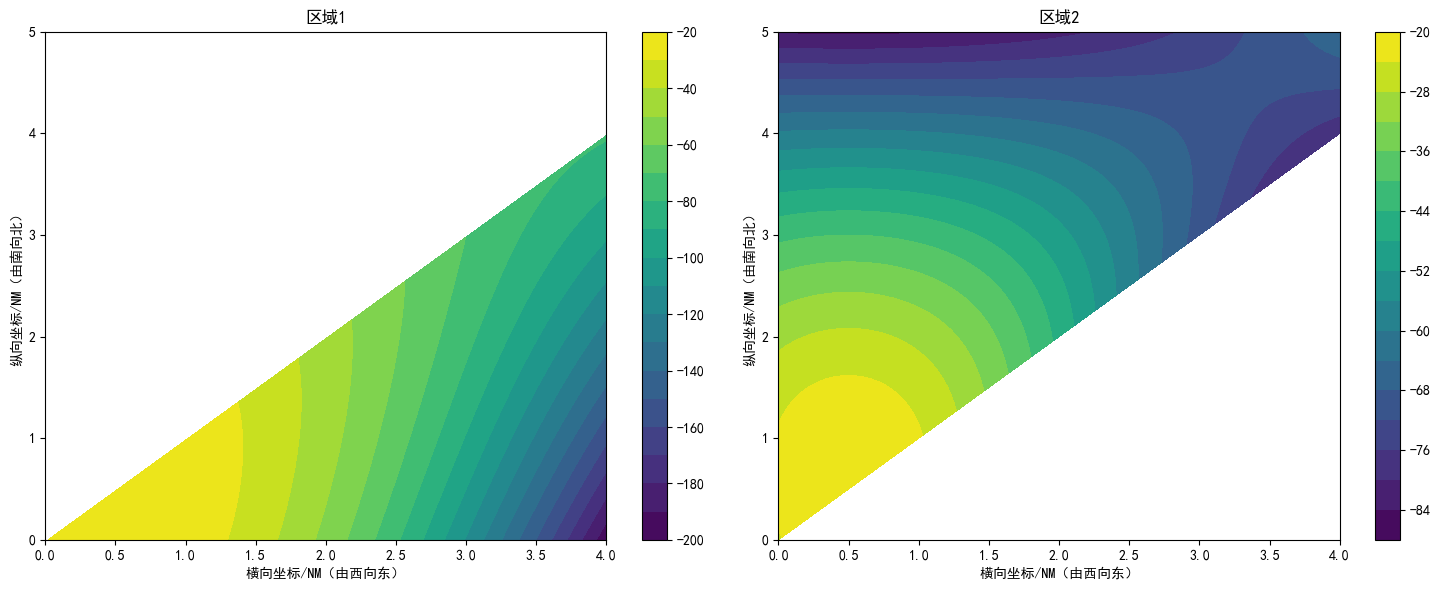

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 加载数据
data = pd.read_excel("E:/数学建模/2023数模/B题/附件.xlsx")

# 提取和处理数据以供绘图
headers = data.iloc[0, 2:].values
latitude = data.iloc[1:, 1].values

cleaned_data = data.iloc[1:, 2:]
cleaned_data.columns = list(headers)
cleaned_data.index = pd.Index(latitude)

X = cleaned_data.columns.values.astype(float)
Y = cleaned_data.index.values.astype(float)
X, Y = np.meshgrid(X, Y)
Z = cleaned_data.values
Z = -Z  # 转换深度为负值

# 沿着对角线划分两个区域
diagonal_mask = np.triu(np.ones_like(Z), k=1)
region_1_data = np.where(diagonal_mask, Z, np.nan)
region_2_data = np.where(diagonal_mask, np.nan, Z)

# 绘制两个区域
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# 区域1
c1 = ax[0].contourf(X, Y, region_1_data, 20, cmap='viridis')
ax[0].set_title('区域1')
ax[0].set_xlabel('横向坐标/NM（由西向东）')
ax[0].set_ylabel('纵向坐标/NM（由南向北）')
fig.colorbar(c1, ax=ax[0])

# 区域2
c2 = ax[1].contourf(X, Y, region_2_data, 20, cmap='viridis')
ax[1].set_title('区域2')
ax[1].set_xlabel('横向坐标/NM（由西向东）')
ax[1].set_ylabel('纵向坐标/NM（由南向北）')
fig.colorbar(c2, ax=ax[1])

plt.tight_layout()
plt.show()


In [26]:
import pandas as pd
import numpy as np

# 加载数据
data = pd.read_excel("E:/数学建模/2023数模/B题/附件.xlsx")
headers = data.iloc[0, 2:].values
latitude = data.iloc[1:, 1].values
cleaned_data = data.iloc[1:, 2:]
cleaned_data.columns = list(headers)
cleaned_data.index = pd.Index(latitude)
X = cleaned_data.columns.values.astype(float)
Y = cleaned_data.index.values.astype(float)
X, Y = np.meshgrid(X, Y)
Z = cleaned_data.values
Z = -Z

# 计算浅水区和深水区的坡度
slope_shallow = 0.314
overlap_rate = 0.10  # 10%
theta = np.pi / 3  # beam angle, assuming 60 degrees in radians

# 使用浅水区的坡度和模型计算每条测线的宽度
W = 2 * (np.cos(slope_shallow) * 65.2) * np.tan(theta / 2)
W_actual = W * (1 - overlap_rate)
num_lines = int(np.ceil(4 * 1.852 * 1000 / W_actual))  # 1 nautical mile = 1.852 km

# 计算所有测线的总长度
line_length_each = 5 * 1.852 * 1000  # 5 nautical miles to meters
total_line_length = num_lines * line_length_each

# 计算覆盖面积和总面积
covered_area_each_line = W_actual * line_length_each
total_covered_area = covered_area_each_line * num_lines
total_area = 5 * 4 * 1.852 * 1.852 * 1e6  # Total area of the region in square meters (5x4 nautical miles)

# 计算漏测面积百分比
missed_area = total_area - total_covered_area
missed_area_percentage = (missed_area / total_area) * 100

# 计算重叠部分超过20%的总长度
excess_overlap_width = (W * overlap_rate - 0.2 * W_actual)
excess_overlap_length = excess_overlap_width * num_lines

# 结果转为表格表示
results = pd.DataFrame({
    '指标': ['所有测线的总长度', '漏测海区占比', '重叠部分超过20%的总长度'],
    '值': [total_line_length, missed_area_percentage, excess_overlap_length]
})

print(results)


              指标             值
0       所有测线的总长度  1.064900e+06
1         漏测海区占比 -4.263769e-02
2  重叠部分超过20%的总长度 -6.587697e+02


所有测线的总长度为 
1
,
064
,
900
1,064,900 米。
漏测海区占总待测海域面积的百分比为 
−
0.0426
%
−0.0426%。
在重叠区域中，重叠率超过20%的部分总长度为 
−
658.77
−658.77 米。

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_excel("E:/数学建模/2023数模/B题/附件.xlsx")

# 提取和处理数据以进行绘图
headers = data.iloc[0, 2:].values
latitude = data.iloc[1:, 1].values

cleaned_data = data.iloc[1:, 2:]
cleaned_data.columns = list(headers)
cleaned_data.index = pd.Index(latitude)

X = cleaned_data.columns.values.astype(float)
Y = cleaned_data.index.values.astype(float)
X, Y = np.meshgrid(X, Y)
Z = cleaned_data.values
Z = -Z

# 坡度和其他参数
alpha = 0.314
alpha_deep = 0.469
theta = np.pi / 3  # 光束角度，假设为60度

# 浅水区和深水区的测线宽度计算
W_shallow = 2 * (np.cos(alpha) * 65.2) * np.tan(theta / 2)
W_deep = 2 * (np.cos(alpha_deep) * 65.2) * np.tan(theta / 2)

W_actual_shallow = W_shallow * (1 - 0.10)  # 浅水区10%重叠率
W_actual_deep = W_deep * (1 - 0.20)  # 深水区20%重叠率

# 计算所需的测线数量
num_lines_shallow = int(np.ceil(2 * 1.852 * 1000 / W_actual_shallow))
num_lines_deep = int(np.ceil(2 * 1.852 * 1000 / W_actual_deep))

# 计算总测线长度和覆盖面积
line_length_each = 5 * 1.852 * 1000
total_line_length_shallow = num_lines_shallow * line_length_each
total_line_length_deep = num_lines_deep * line_length_each
total_line_length_new = total_line_length_shallow + total_line_length_deep

covered_area_shallow = W_actual_shallow * line_length_each * num_lines_shallow
covered_area_deep = W_actual_deep * line_length_each * num_lines_deep

# 计算漏测面积百分比
total_area = 5 * 4 * 1.852 * 1.852 * 1e6
total_covered_area_new = covered_area_shallow + covered_area_deep
missed_area_new = total_area - total_covered_area_new
missed_area_percentage_new = (missed_area_new / total_area) * 100

# 计算超过20%的重叠长度
excess_overlap_width_shallow = (W_shallow * 0.10 - 0.2 * W_actual_shallow)
excess_overlap_width_deep = (W_deep * 0.20 - 0.2 * W_actual_deep)
excess_overlap_length_shallow = excess_overlap_width_shallow * num_lines_shallow
excess_overlap_length_deep = excess_overlap_width_deep * num_lines_deep
excess_overlap_length_new = excess_overlap_length_shallow + excess_overlap_length_deep

total_line_length_new, missed_area_percentage_new, excess_overlap_length_new


(1176020.0, -0.497751738236162, -146.8954565627069)